# IndoSum Statistics

# Importing Libraries

In [1]:
import os
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Initialize the random number generator.
np.random.seed(42)

In [2]:
# ! mv times-new-roman.ttf /usr/share/fonts/truetype/
# ! fc-cache -f -v

# path = "/usr/share/fonts/truetype/times-new-roman.ttf"
# fontProp = fm.FontProperties(fname=path)
fontProp = fm.FontProperties(family="serif")

# Downloading Dataset

In [3]:
# Download indosum.tar.gz.
os.system('gdown https://drive.google.com/uc?id=1jPHVCx33-nseIKdLV8lBu6SCwESwl0te')
## Extracting indosum.tar.gz.
! tar -xvf indosum.tar.gz
! rm indosum.tar.gz

indosum/
indosum/test.02.jsonl
indosum/README.txt
indosum/train.05.jsonl
indosum/train.04.jsonl
indosum/test.04.jsonl
indosum/train.01.jsonl
indosum/test.05.jsonl
indosum/test.03.jsonl
indosum/test.01.jsonl
indosum/dev.04.jsonl
indosum/dev.01.jsonl
indosum/dev.02.jsonl
indosum/train.02.jsonl
indosum/dev.03.jsonl
indosum/dev.05.jsonl
indosum/CHANGELOG.txt
indosum/train.03.jsonl


# Get Unique Documents

In [4]:
#######################################
# Get unique data and classify them. #
#####################################
folds = 5
categoryDict = {"tajuk utama":{}, "teknologi":{}, "hiburan":{}, "olahraga":{}, "showbiz":{}, "inspirasi":{}}
for k in range(1, folds+1): # Loop over k.
  for type in ["train", "dev", "test"]: # Loop over types.
    with open(f"indosum/{type}.0{k}.jsonl") as lines:
      for line in lines:
        jsonObj = json.loads(line)
        categoryDict[jsonObj["category"]][jsonObj["id"]] = jsonObj # Pool the data into a dictionary.

total = 0
for value in categoryDict.values():
  total += len(value)
print(f"Number of Unique: {total}")

Number of Unique: 18774


# Length of Articles

In [5]:
def countToken(jsonObj):
  """
  This function counts how many tokens in the document.
  """
  tokenCount = 0
  for paragraph in jsonObj["paragraphs"]: # Loop over paragraphs.
    for sentence in paragraph: # Loop over sentences.
      tokenCount += len(sentence)
  
  return tokenCount

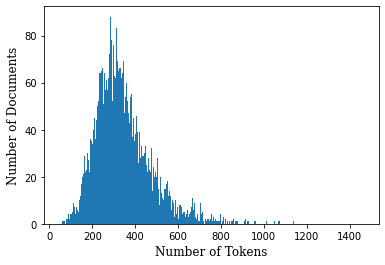

MIN: 45
MAX: 1464
MED: 324
AVG: 347
indosum-doc-length.csv


In [6]:
#######################
# Length of Articles #
####################
aList = []
for dictionary in categoryDict.values(): # Loop over categories.
  for jsonObj in dictionary.values(): # Loop over documents.
    tokenCount = countToken(jsonObj) # Count tokens.
    aList.append(tokenCount)

fig = plt.figure()
plt.xlabel("Number of Tokens", fontproperties=fontProp, fontsize=12)
plt.ylabel("Number of Documents", fontproperties=fontProp, fontsize=12)
plt.hist(aList, bins=1464)
fig.savefig("indosum-histogram.pdf", bbox_inches='tight')
plt.show()

print(f"MIN: {np.min(aList)}")
print(f"MAX: {np.max(aList)}")
print(f"MED: {int(np.median(aList))}")
print(f"AVG: {math.ceil(np.average(aList))}")

df = pd.DataFrame({"length":aList})
df.to_csv("indosum-doc-length.csv", index=False)
print("indosum-doc-length.csv")

# Length of Abstractive Summaries

In [7]:
def countAbsSummaryToken(jsonObj):
  """
  This function counts how many tokens in the abstractive summarization of the document.
  """
  tokenCount = 0
  for sentence in jsonObj["summary"]: # Loop over sentences.
    tokenCount += len(sentence)
  
  return tokenCount

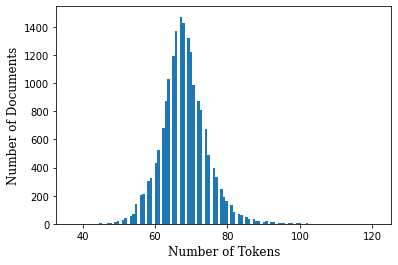

MIN: 37
MAX: 121
MED: 68
AVG: 69


In [8]:
####################################
# Length of Abstractive Summaries #
##################################
aList = []
for dictionary in categoryDict.values(): # Loop over categories.
  for jsonObj in dictionary.values(): # Loop over documents.
    tokenCount = countAbsSummaryToken(jsonObj) # Count tokens.
    aList.append(tokenCount)

plt.xlabel("Number of Tokens", fontproperties=fontProp, fontsize=12)
plt.ylabel("Number of Documents", fontproperties=fontProp, fontsize=12)
plt.hist(aList, bins=121)
plt.show()

print(f"MIN: {np.min(aList)}")
print(f"MAX: {np.max(aList)}")
print(f"MED: {int(np.median(aList))}")
print(f"AVG: {math.ceil(np.average(aList))}")

# Length of Extractive Summaries

In [9]:
def countExtSummaryToken(jsonObj):
  """
  This function counts how many tokens in the extractive summarization of the document.
  """
  tokenCount = 0
  for labels, paragraph in zip(jsonObj["gold_labels"], jsonObj["paragraphs"]): # Loop over paragraphs.
    for label, sentence in zip(labels, paragraph): # Loop over sentences.
      if label == True or label == "True": # If the sentence is a part of the summary.
        tokenCount += len(sentence)
  
  return tokenCount

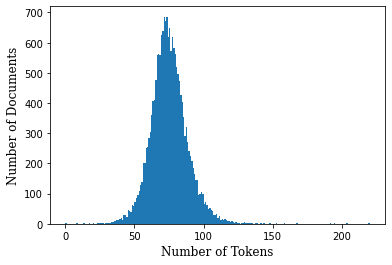

MIN: 0
MAX: 220
MED: 74
AVG: 75
MIN: 8


In [10]:
###################################
# Length of Extractive Summaries #
###############################
aList = []
for dictionary in categoryDict.values(): # Loop over categories.
  for jsonObj in dictionary.values(): # Loop over documents.
    tokenCount = countExtSummaryToken(jsonObj) # Count tokens.
    aList.append(tokenCount)

plt.xlabel("Number of Tokens", fontproperties=fontProp, fontsize=12)
plt.ylabel("Number of Documents", fontproperties=fontProp, fontsize=12)
plt.hist(aList, bins=220)
plt.show()

print(f"MIN: {np.min(aList)}")
print(f"MAX: {np.max(aList)}")
print(f"MED: {int(np.median(aList))}")
print(f"AVG: {math.ceil(np.average(aList))}")

aList = [i for i in aList if i != 0]
print(f"MIN: {np.min(aList)}")

# IndoSum Data Distribution

In [11]:
##############################
# IndoSum Data Distribution #
############################

folds = 5
catDicts = []
for k in range(1, folds+1): # Loop over k.
  totalDict = {"file": "TOTAL", "tajuk utama":0, "teknologi":0, "hiburan":0, "olahraga":0, "showbiz":0, "inspirasi":0, "TOTAL":0}
  for type in ["train", "dev", "test"]: # Loop over types.
    categories = []
    with open(f"indosum/{type}.0{k}.jsonl") as lines:
      for line in lines:
        jsonObj = json.loads(line)
        categories.append(jsonObj["category"])

    catDict = {"file": f"{type}.0{k}.jsonl", "tajuk utama":0, "teknologi":0, "hiburan":0, "olahraga":0, "showbiz":0, "inspirasi":0, "TOTAL":0}
    for category in categories:
      catDict[category] += 1
      catDict["TOTAL"] += 1
    catDicts.append(catDict)

    for category, count in catDict.items():
      totalDict[category] += count
    totalDict["file"] = "TOTAL"

  catDicts.append(totalDict)

df = pd.DataFrame(catDicts, columns=["file", "tajuk utama", "olahraga", "showbiz", "teknologi", "hiburan", "inspirasi", "TOTAL"])
df.head(20)

,file,tajuk utama,olahraga,showbiz,teknologi,hiburan,inspirasi,TOTAL
0,train.01.jsonl,5454,3624,1982,1734,1372,96,14262
1,dev.01.jsonl,282,192,103,92,76,5,750
2,test.01.jsonl,1456,952,493,477,355,29,3762
3,TOTAL,7192,4768,2578,2303,1803,130,18774
4,train.02.jsonl,5428,3662,1976,1724,1378,95,14263
5,dev.02.jsonl,287,193,93,114,61,1,749
6,test.02.jsonl,1477,913,509,465,364,34,3762
7,TOTAL,7192,4768,2578,2303,1803,130,18774
8,train.03.jsonl,5522,3588,1949,1767,1357,107,14290
9,dev.03.jsonl,279,180,105,107,70,6,747
